## Import the libraries

In [5]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from scipy.stats import norm
import seaborn as sns

from pandasql import sqldf 

## Load the data

In [102]:
df = pd.read_csv("/Users/ashutoshfolane/Documents/VIBHUTI/Git_Repos/Datasets/TL/fit_finder_sessions.csv")
df.head(5)

,USER_ID,EVENT_ID,SESSION_ID,EVENT_TIME,SESSION_TIME,DATE_SESSION_TIME,PLATFORM,DEVICE_TYPE,COUNTRY,REGION,...,REFERRER,LANDING_PAGE,BROWSER,UTM_SOURCE,UTM_CAMPAIGN,UTM_MEDIUM,UTM_TERM,PATH,HASH,TITLE
0,2557545626170835,6856211171875180,1042303506666311,2020-08-29 13:23:24.389000-07:00,2020-08-29 13:21:48.717000-07:00,2020-08-29,iOS 13.6.1,Mobile,United States,Massachusetts,...,NaN,www.thirdlove.com/pages/fit-finder,Mobile Safari UI/WKWebView 13.6.1,facebook,internal-prspt internal,paidsocial,NaN,/pages/fit-finder,#size_found_email,ThirdLove Fit Finder - Find your Perfect Bra S...
1,8769781012632591,6873230842419410,5067325497049704,2020-10-10 04:56:54.729000-07:00,2020-10-10 04:52:49.620000-07:00,2020-10-10,iOS 14.0.1,Mobile,United States,New York,...,https://www.google.com,www.thirdlove.com/collections/bras,Mobile Safari 14.0,google,search-branded exact,cpc,NaN,/pages/fit-finder,#size_found_email,ThirdLove Fit Finder - Find your Perfect Bra S...
2,7976668210479710,6602106094447681,1930848148732900,2020-09-22 14:04:01.964000-07:00,2020-09-22 13:59:35.683000-07:00,2020-09-22,Mac OS X 10.15.6,Desktop,United States,California,...,https://www.google.com/,www.thirdlove.com/pages/fit-finder,Chrome 85.0.4183,google,search-branded exact,cpc,NaN,/pages/fit-finder,#size_found_email,ThirdLove Fit Finder - Find your Perfect Bra S...
3,7209582442183468,7677844478512822,8014698450883448,2020-08-15 11:58:04.338000-07:00,2020-08-15 11:46:24.122000-07:00,2020-08-15,Mac OS X 10.13.6,Desktop,United States,Maryland,...,https://www.thirdlove.com/collections/bras?cli...,www.thirdlove.com/products/24-7-classic-t-shir...,Safari 13.1.2,NaN,NaN,NaN,NaN,/pages/fit-finder,#size_found_email,ThirdLove Fit Finder - Find your Perfect Bra S...
4,5978456661474559,7272493436495001,7545268238894768,2020-08-17 18:33:13.857000-07:00,2020-08-17 18:25:36.429000-07:00,2020-08-17,iOS 13.5.1,Mobile,United States,Illinois,...,http://m.facebook.com,www.thirdlove.com/pages/fit-guarantee-1,Mobile Safari UI/WKWebView 13.5.1,facebook,internal-broad sep,paidsocial,NaN,/pages/fit-finder,#size_found_email,ThirdLove Fit Finder - Find your Perfect Bra S...


## Check the shape of the dataframes:

In [12]:
print(df.shape)

(533201, 21)


## Check NA values:

In [13]:
missing_val = df.isnull().sum()
missing_val

USER_ID                   0
EVENT_ID                  0
SESSION_ID                0
EVENT_TIME                0
SESSION_TIME              0
DATE_SESSION_TIME         0
PLATFORM                  0
DEVICE_TYPE               0
COUNTRY                  45
REGION                 7880
CITY                  16571
REFERRER             222125
LANDING_PAGE             24
BROWSER                   0
UTM_SOURCE           281779
UTM_CAMPAIGN         288735
UTM_MEDIUM           281870
UTM_TERM             463049
PATH                      0
HASH                      0
TITLE                     0
dtype: int64

In [6]:
mysql = lambda q: sqldf(q, globals())

In [9]:
mysql("SELECT * FROM df LIMIT 5;")

,USER_ID,EVENT_ID,SESSION_ID,EVENT_TIME,SESSION_TIME,DATE_SESSION_TIME,PLATFORM,DEVICE_TYPE,COUNTRY,REGION,...,REFERRER,LANDING_PAGE,BROWSER,UTM_SOURCE,UTM_CAMPAIGN,UTM_MEDIUM,UTM_TERM,PATH,HASH,TITLE
0,2557545626170835,6856211171875180,1042303506666311,2020-08-29 13:23:24.389000-07:00,2020-08-29 13:21:48.717000-07:00,2020-08-29,iOS 13.6.1,Mobile,United States,Massachusetts,...,None,www.thirdlove.com/pages/fit-finder,Mobile Safari UI/WKWebView 13.6.1,facebook,internal-prspt internal,paidsocial,None,/pages/fit-finder,#size_found_email,ThirdLove Fit Finder - Find your Perfect Bra S...
1,8769781012632591,6873230842419410,5067325497049704,2020-10-10 04:56:54.729000-07:00,2020-10-10 04:52:49.620000-07:00,2020-10-10,iOS 14.0.1,Mobile,United States,New York,...,https://www.google.com,www.thirdlove.com/collections/bras,Mobile Safari 14.0,google,search-branded exact,cpc,None,/pages/fit-finder,#size_found_email,ThirdLove Fit Finder - Find your Perfect Bra S...
2,7976668210479710,6602106094447681,1930848148732900,2020-09-22 14:04:01.964000-07:00,2020-09-22 13:59:35.683000-07:00,2020-09-22,Mac OS X 10.15.6,Desktop,United States,California,...,https://www.google.com/,www.thirdlove.com/pages/fit-finder,Chrome 85.0.4183,google,search-branded exact,cpc,None,/pages/fit-finder,#size_found_email,ThirdLove Fit Finder - Find your Perfect Bra S...
3,7209582442183468,7677844478512822,8014698450883448,2020-08-15 11:58:04.338000-07:00,2020-08-15 11:46:24.122000-07:00,2020-08-15,Mac OS X 10.13.6,Desktop,United States,Maryland,...,https://www.thirdlove.com/collections/bras?cli...,www.thirdlove.com/products/24-7-classic-t-shir...,Safari 13.1.2,None,None,None,None,/pages/fit-finder,#size_found_email,ThirdLove Fit Finder - Find your Perfect Bra S...
4,5978456661474559,7272493436495001,7545268238894768,2020-08-17 18:33:13.857000-07:00,2020-08-17 18:25:36.429000-07:00,2020-08-17,iOS 13.5.1,Mobile,United States,Illinois,...,http://m.facebook.com,www.thirdlove.com/pages/fit-guarantee-1,Mobile Safari UI/WKWebView 13.5.1,facebook,internal-broad sep,paidsocial,None,/pages/fit-finder,#size_found_email,ThirdLove Fit Finder - Find your Perfect Bra S...


## How many total users are there?


In [14]:
query1 = '''
SELECT COUNT(USER_ID) as Total_User FROM df;
'''

mysql(query1)

,Total_User
0,533201


In [22]:
df['USER_ID'].count()

533201

### checking if there are any duplicate USER_ID using DISTINCT ...................

In [15]:
query2 = '''
SELECT COUNT(DISTINCT USER_ID) as Total_Distinct_User FROM df;
'''

mysql(query2)

,Total_Distinct_User
0,422523


In [23]:
df['USER_ID'].nunique()

422523

## How many total sessions?

In [17]:
query3 = '''
SELECT COUNT(SESSION_ID) as Total_Session FROM df;
'''

mysql(query3)

,Total_User
0,533201


In [24]:
df['SESSION_ID'].count()

533201

### checking if there are any duplicate Session_ID using DISTINCT ...................

In [19]:
query4 = '''
SELECT COUNT(DISTINCT SESSION_ID) as Total_Distinct_Session FROM df;
'''

mysql(query4)

,Total_Distinct_Session
0,468557


In [25]:
df['SESSION_ID'].nunique()

468557

## What are the top 5 user_id by session count?

In [29]:
query5 = '''
SELECT 
    USER_ID,
    COUNT(SESSION_ID) as CNT_SESSION_PER_USER
FROM df
GROUP BY USER_ID
ORDER BY COUNT(SESSION_ID) DESC
LIMIT 5;
'''

mysql(query5)

,USER_ID,CNT_SESSION_PER_USER
0,6980500603708581,78
1,5309056998314637,78
2,2752218800663794,59
3,1639547605322316,49
4,5667432726999624,35


In [103]:
session_cnt_df = df.groupby(['USER_ID']).agg({'SESSION_ID':'count'}).reset_index().rename(columns = {'SESSION_ID':'SESSION_CNT_PER_USER'})
session_cnt_df.sort_values(by = ['SESSION_CNT_PER_USER'], ascending=False).head(5)


,USER_ID,SESSION_CNT_PER_USER
327615,6980500603708581,78
249300,5309056998314637,78
129202,2752218800663794,59
77111,1639547605322316,49
266083,5667432726999624,35


In [105]:
session_df = df[['USER_ID','SESSION_ID']]
session_cnt_df = session_df.groupby(['USER_ID']).count().reset_index().rename(columns = {'SESSION_ID':'Counts'})
session_cnt_df.sort_values(by = ['Counts'], ascending=False).head(5)

,USER_ID,Counts
327615,6980500603708581,78
249300,5309056998314637,78
129202,2752218800663794,59
77111,1639547605322316,49
266083,5667432726999624,35


In [ ]:
session_cnt_df = df.groupby(['USER_ID']).count().reset_index().rename(columns = {'Text':'Counts'})

## Produce a plot of sessions by day - are there any intersting patterns?

In [53]:
df.head(2)

,USER_ID,EVENT_ID,SESSION_ID,EVENT_TIME,SESSION_TIME,DATE_SESSION_TIME,PLATFORM,DEVICE_TYPE,COUNTRY,REGION,...,REFERRER,LANDING_PAGE,BROWSER,UTM_SOURCE,UTM_CAMPAIGN,UTM_MEDIUM,UTM_TERM,PATH,HASH,TITLE
0,2557545626170835,6856211171875180,1042303506666311,2020-08-29 13:23:24.389000-07:00,2020-08-29 13:21:48.717000-07:00,2020-08-29,iOS 13.6.1,Mobile,United States,Massachusetts,...,NaN,www.thirdlove.com/pages/fit-finder,Mobile Safari UI/WKWebView 13.6.1,facebook,internal-prspt internal,paidsocial,NaN,/pages/fit-finder,#size_found_email,ThirdLove Fit Finder - Find your Perfect Bra S...
1,8769781012632591,6873230842419410,5067325497049704,2020-10-10 04:56:54.729000-07:00,2020-10-10 04:52:49.620000-07:00,2020-10-10,iOS 14.0.1,Mobile,United States,New York,...,https://www.google.com,www.thirdlove.com/collections/bras,Mobile Safari 14.0,google,search-branded exact,cpc,NaN,/pages/fit-finder,#size_found_email,ThirdLove Fit Finder - Find your Perfect Bra S...


In [62]:
session_df = df[['USER_ID','EVENT_ID','SESSION_ID','SESSION_TIME','DATE_SESSION_TIME','DEVICE_TYPE']]
# session_df['SESSION_TIME'] = pd.to_datetime(session_df['SESSION_TIME'],dayfirst=True)
# session_df['SESSION_DAYOFWEEK'] = session_df['SESSION_TIME'].dt.day_name()
session_df['DATE_SESSION_TIME'] = pd.to_datetime(session_df['DATE_SESSION_TIME'])
session_df['DAYOFWEEK'] = session_df['DATE_SESSION_TIME'].dt.day_name()
session_df.head(5)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,USER_ID,EVENT_ID,SESSION_ID,SESSION_TIME,DATE_SESSION_TIME,DEVICE_TYPE,DAYOFWEEK
0,2557545626170835,6856211171875180,1042303506666311,2020-08-29 13:21:48.717000-07:00,2020-08-29,Mobile,Saturday
1,8769781012632591,6873230842419410,5067325497049704,2020-10-10 04:52:49.620000-07:00,2020-10-10,Mobile,Saturday
2,7976668210479710,6602106094447681,1930848148732900,2020-09-22 13:59:35.683000-07:00,2020-09-22,Desktop,Tuesday
3,7209582442183468,7677844478512822,8014698450883448,2020-08-15 11:46:24.122000-07:00,2020-08-15,Desktop,Saturday
4,5978456661474559,7272493436495001,7545268238894768,2020-08-17 18:25:36.429000-07:00,2020-08-17,Mobile,Monday


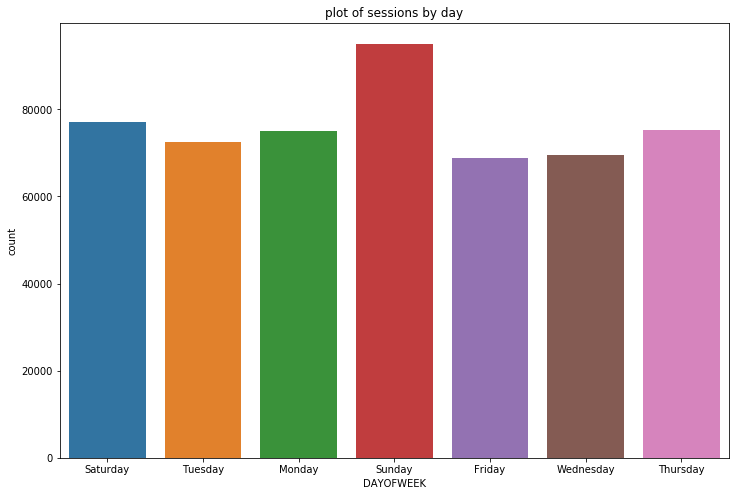

In [65]:
# plot_df = [['SESSION_ID','DAYOFWEEK']]

#looking for insight by day
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
sns.countplot(x='DAYOFWEEK', data=session_df)
plt.title('plot of sessions by day')
plt.show()


## Produce a plot of sessions by day by device type - are there any intersting patterns?

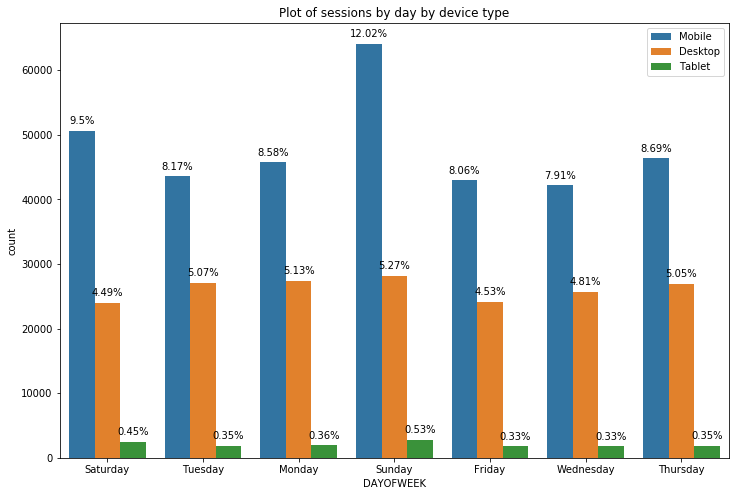

In [67]:
# looking for insight in status
plt.figure(figsize=(12, 8))
ax =sns.countplot(x="DAYOFWEEK",hue ="DEVICE_TYPE", data=session_df)
total = len(session_df)
for p in ax.patches:
    value = round((p.get_height()/total)*100,2)
    ax.annotate(str('{:}%'.format(value)), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.legend(loc='upper right')
plt.title('Plot of sessions by day by device type')
plt.show()

## Produce a plot of sessions by weekending sunday

In [68]:
df.head(2)

,USER_ID,EVENT_ID,SESSION_ID,EVENT_TIME,SESSION_TIME,DATE_SESSION_TIME,PLATFORM,DEVICE_TYPE,COUNTRY,REGION,...,REFERRER,LANDING_PAGE,BROWSER,UTM_SOURCE,UTM_CAMPAIGN,UTM_MEDIUM,UTM_TERM,PATH,HASH,TITLE
0,2557545626170835,6856211171875180,1042303506666311,2020-08-29 13:23:24.389000-07:00,2020-08-29 13:21:48.717000-07:00,2020-08-29,iOS 13.6.1,Mobile,United States,Massachusetts,...,NaN,www.thirdlove.com/pages/fit-finder,Mobile Safari UI/WKWebView 13.6.1,facebook,internal-prspt internal,paidsocial,NaN,/pages/fit-finder,#size_found_email,ThirdLove Fit Finder - Find your Perfect Bra S...
1,8769781012632591,6873230842419410,5067325497049704,2020-10-10 04:56:54.729000-07:00,2020-10-10 04:52:49.620000-07:00,2020-10-10,iOS 14.0.1,Mobile,United States,New York,...,https://www.google.com,www.thirdlove.com/collections/bras,Mobile Safari 14.0,google,search-branded exact,cpc,NaN,/pages/fit-finder,#size_found_email,ThirdLove Fit Finder - Find your Perfect Bra S...


## --Bonus questions --

## On average, how many pages do users view in their first session?

In [77]:
query6 = '''
WITH first_session_info as (SELECT 
    USER_ID,
    MIN(DATE_SESSION_TIME) as first_Session,
    COUNT(EVENT_ID) as page_views
FROM df
GROUP BY USER_ID)

SELECT 
    SUM(page_views)/COUNT(USER_ID) as Avg_Page_View
FROM first_session_info
;
'''

mysql(query6)

,Avg_Page_View
0,1


In [99]:
query6 = '''
WITH first_session_info as (SELECT 
    USER_ID,
    MIN(DATE_SESSION_TIME) as first_Session,
    EVENT_ID
FROM df
GROUP BY USER_ID)

SELECT 
    COUNT(EVENT_ID)/COUNT(USER_ID) as Avg_Page_View
FROM first_session_info
;
'''

mysql(query6)

,Avg_Page_View
0,1


In [89]:
f_df.to_csv('data.csv', sep='\t')

## one might assume session_id is assigned sequentially (eg for example user_id: 101, session_id on '10/1/2020' might be 1234, session_id for '10/2/2020' would be 1235 or some number > 1234) - is this the case?  if not provide some example user_id, session_id combinations.

In [100]:
# To answer to above question, lets extract data for user who has records for mulitple dates.

query7 = '''
SELECT 
    USER_ID,
    SESSION_ID,
    DATE_SESSION_TIME
FROM df
WHERE USER_ID = 6980500603708581
ORDER BY DATE_SESSION_TIME
;
'''

mysql(query7)

,USER_ID,SESSION_ID,DATE_SESSION_TIME
0,6980500603708581,2020864106341291,2020-08-06
1,6980500603708581,6853553032095985,2020-08-07
2,6980500603708581,3339878771508564,2020-08-10
3,6980500603708581,5587773228829412,2020-08-10
4,6980500603708581,1668480138957162,2020-08-10
...,...,...,...
73,6980500603708581,8428409825797095,2020-10-08
74,6980500603708581,8952330034880792,2020-10-14
75,6980500603708581,4493411269877899,2020-10-19
76,6980500603708581,3987037972712537,2020-10-28


- From the above output we can say that:
    <b>USER_ID = '6980500603708581'</b> on <b>2020-08-06</b> has <b>SESSION_ID = '2020864106341291'</b> 
and the same USER on 2020-08-07 has SESSION_ID = '6853553032095985' 
- Therefore session_id is not assigned sequentially